In [37]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from lens_simulation import Lens, Simulation
from scipy import fftpack
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
amplitude = 10000
pixel_size = 0.1e-6 
n_slices = 1000

lens_width = 100e-6

lens = Lens.Lens(
    diameter=lens_width,
    height=0,
    exponent=2.,
    medium=Lens.Medium(2.348)
)

lens.generate_profile(pixel_size=pixel_size)

centre_px = (len(lens.profile)-1)//2
medium = Lens.Medium(1.0)
# print(Simulation.calculate_equivalent_focal_distance(lens, medium))

# plt.plot(lens.profile)
# plt.show()

In [147]:
# specify desired angle
theta_deg = 30
theta = np.deg2rad(theta_deg)

NA = 0.7
medium = Lens.Medium(1.0)

def theta_from_NA(numerical_aperture, output_medium):
    import numpy as np
    return np.arcsin(numerical_aperture/output_medium)

def focal_distance_from_theta(lens, theta):
    return lens.diameter/2 / np.tan(theta)

def height_from_focal_distance(lens, output_medium, focus):
    a = 1
    b = -2*focus*(lens.medium.refractive_index-output_medium.refractive_index)/output_medium.refractive_index
    c = (lens.diameter/2)**2

    if (b**2 - 4*a*c < 0):
        raise ValueError("Negative value encountered in sqrt.  Can't find a lens height to give this focal distance")
    else: return (-b - np.sqrt(b**2 - 4*a*c))/(2*a)

theta_calc = theta_from_NA(NA, medium.refractive_index)
# theta_calc = theta
print(f'Angle of convergence: {np.rad2deg(theta)}')

focal_distance = focal_distance_from_theta(lens, theta_calc)*10.3079
print(f'Focal distance wanted: {focal_distance*1e3}mm')
lens.height = height_from_focal_distance(lens, output_medium=medium, focus=focal_distance)
lens.generate_profile(pixel_size=pixel_size)

# print(f'Height 1: {round(h1*1e6, 3)}um')
print(f'Height 2: {round(lens.height*1e6, 3)}um')
print(f'New Focal Distance: {Simulation.calculate_equivalent_focal_distance(lens, medium)*1e3}mm')

# print(lens.height)


Angle of convergence: 29.999999999999996
Focal distance wanted: 0.5258080721326919mm
Height 2: 1.766um
New Focal Distance: 0.5258080721327097mm


In [148]:
A = 10000
sim_wavelength = 488e-9

frequency_array_1 = Simulation.generate_squared_frequency_array(
    n_pixels=len(lens.profile), pixel_size=pixel_size)

# assert length == len(lens_1.profile)

# print(len(frequency_array_1))

# Angle of incoming illumination beam
# theta = np.deg2rad(30)

print(lens.diameter)

start_distance_1 = 0.
# finish_distance_1 = sim_width/2
finish_distance_1 = focal_distance

delta_1 = (lens.medium.refractive_index-medium.refractive_index) * lens.profile
phase_1 = (2 * np.pi * delta_1 / sim_wavelength) % (2 * np.pi)

0.0001


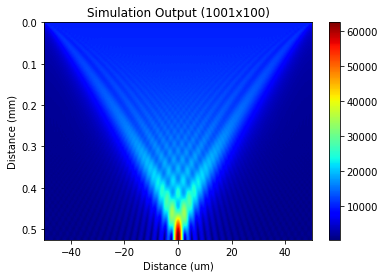

In [149]:
wavefront_1 = A * np.exp(1j * phase_1)

# Applying aperture 
# wavefront_1[0:int(cut/2)] = 0 + 0j
# wavefront_1[-int(cut):] = 0 + 0j

wavefront_1 = fftpack.fft(wavefront_1)

n_slices_1 = 100

sim_1 = np.ones(shape=((n_slices_1), len(lens.profile)))
distances_1 = np.linspace(start_distance_1, finish_distance_1, n_slices_1)
for i, z in enumerate(distances_1):
    prop_1 = np.exp(1j * medium.wave_number * z) * np.exp(
        (-1j * 2 * np.pi ** 2 * z * frequency_array_1) / medium.wave_number
    )
    # print("prop shape: ", prop.shape)
    propagation = fftpack.ifft(prop_1 * wavefront_1)

    output = np.sqrt(propagation.real ** 2 + propagation.imag ** 2)

    sim_1[i] = np.round(output, 10)

from lens_simulation import utils
utils.plot_simulation(sim_1, sim_1.shape[1], sim_1.shape[0], pixel_size, start_distance_1, finish_distance_1)
plt.show()
passed_wavefront = propagation


In [114]:
lens_h1 = Lens.Lens(
    diameter=sim_width,
    height=h1,
    exponent=2.,
    medium=Lens.Medium(2.348)
)
lens_h1.generate_profile(pixel_size=pixel_size)

print(Simulation.calculate_equivalent_focal_distance(lens_h1, medium))


0.000515395


In [115]:
lens_h2 = Lens.Lens(
    diameter=sim_width,
    height=h2,
    exponent=2.,
    medium=Lens.Medium(2.348)
)
lens_h2.generate_profile(pixel_size=pixel_size)

print(Simulation.calculate_equivalent_focal_distance(lens_h2, medium))


0.0005153950000000019
